In [7]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
import math

In [12]:
def convolution(img, kernel, average=False):

    if len(img.shape) == 3:
        print("The img has 3 Channels and the corresponding shape: {}".format(img.shape))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        print("Converted to Grayscale. The shape now becomes : {}".format(img.shape))
    else:
        print("img shape : {}".format(img.shape))

    img_row, img_col = img.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(img.shape)  #output matrix

    padding_height = int((kernel_row - 1) / 2) #padding height
    padding_width = int((kernel_col - 1) / 2)  #padding width

    padded_img = np.zeros((img_row + (2 * padding_height), img_col + (2 * padding_width)))
    padded_img[padding_height : (padded_img.shape[0]-padding_height), padding_width : (padded_img.shape[1]-padding_width)] = img

    for i in range(img_row):
        for j in range(img_col):
            output[i, j] = np.sum(kernel * padded_img[i:i + kernel_row, j:j + kernel_col])
            if average:
                output[i, j] /= kernel.shape[0] * kernel.shape[1]

    print("Output img size : {}".format(output.shape))

    plt.imshow(output, cmap='gray')
    plt.title("Output img using {}X{} Kernel".format(kernel_row, kernel_col))
    plt.show()

    return output

In [16]:
def dnorm(x, mu, stnd_dev):
    return 1 / (np.sqrt(2 * np.pi) * stnd_dev) * np.e ** (-np.power((x - mu) / stnd_dev, 2) / 2)

def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()

    return kernel_2D

def gaussian_blur(image, kernel_size):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))
    return convolution(image, kernel, average=True)

The img has 3 Channels and the corresponding shape: (512, 512, 3)
Converted to Grayscale. The shape now becomes : (512, 512)
Output img size : (512, 512)


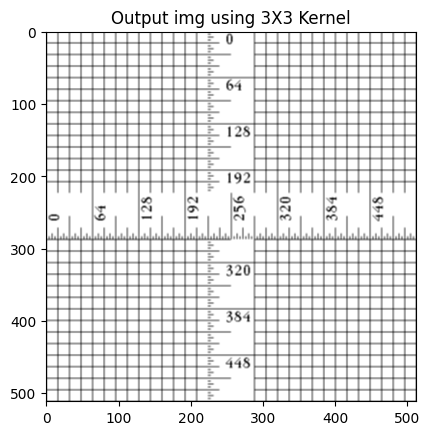

The img has 3 Channels and the corresponding shape: (512, 512, 3)
Converted to Grayscale. The shape now becomes : (512, 512)
Output img size : (512, 512)


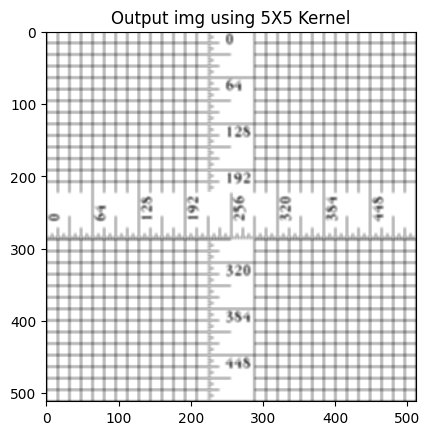

In [17]:
if __name__ == '__main__':

    image = cv2.imread("/content/drive/MyDrive/DIP A1 data/ruler.512.tiff")
    gaussian_blur(image, 3)
    gaussian_blur(image, 5)

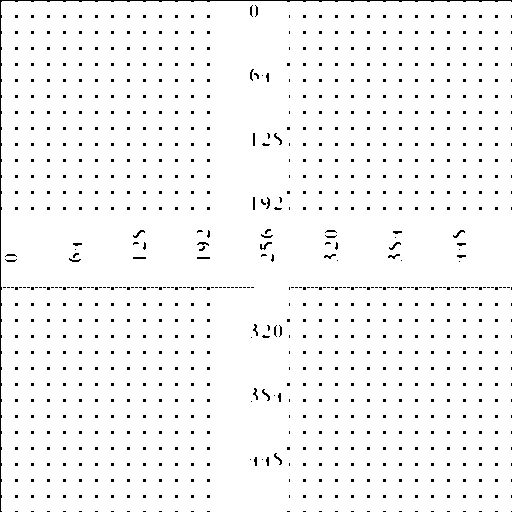

In [18]:
import numpy as np
from google.colab.patches import cv2_imshow

def median_filter(img, kernel_size):
    """
    Apply a median filter to the input image.
    Args:
        image (numpy.ndarray): Input image as a NumPy array.
        kernel_size (int): Size of the square kernel (must be odd).
    Returns:
        numpy.ndarray: Filtered image.
    """

    # if kernel_size % 2 == 0:
    #     raise ValueError("Kernel size must be odd.")

    # Get the dimensions of the image
    height, width, channels = img.shape

    # Initialize an empty output image
    filtered_image = np.zeros_like(img)

    # Pad the image to handle edge pixels
    pad_width = kernel_size // 2
    padded_image = np.pad(img, ((pad_width, pad_width), (pad_width, pad_width), (0, 0)), mode='constant')

    # Apply the median filter
    for y in range(height):
        for x in range(width):
            for c in range(channels):

                # Extract the neighborhood
                neighborhood = padded_image[y:y+kernel_size, x:x+kernel_size, c]

                # Calculate the median and assign it to the output image
                filtered_image[y, x, c] = np.median(neighborhood)
    return filtered_image

input_image = cv2.imread('/content/drive/MyDrive/DIP A1 data/ruler.512.tiff')
filtered_image = median_filter(input_image, kernel_size=3)
cv2_imshow(filtered_image)

Output img using 5x5 Kernel


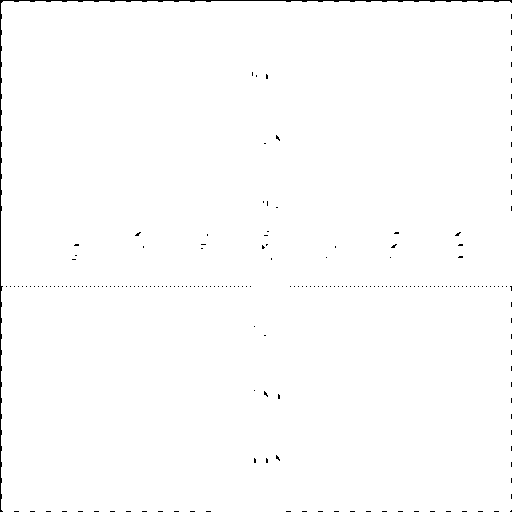

In [19]:
filter_img2 = median_filter(input_image, kernel_size=5)
print("Output img using 5x5 Kernel")
cv2_imshow(filter_img2)